# <u>Métodos Supervisados para Clasificación - Parte 1</u>

## Caso de uso

<img src = 'https://datahack-prod.s3.ap-south-1.amazonaws.com/__sized__/contest_cover/loanpre-thumbnail-1200x1200.png'>

### Importación de librerías iniciales

In [62]:
import warnings
warnings.filterwarnings("ignore")

#Importar las librerías necesarias en Python.
import pandas as pd      ## Manejo de dataframes o set de datos
import numpy as np       ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats  ## Herramientas y algoritmos matemáticos para python

import seaborn as sns
import matplotlib.pyplot as plt

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [64]:
seed = 2021

In [65]:
target = 'Loan_Status'

### **Lectura Inicial de base de datos**

Utilizaremos las bases de este caso ya preprocesadas en el notebook del Módulo 13. Estas bases ya recibieron el siguiente tratamiento previo:

1. División train test 80/20
2. Tratamiento de nulos
3. Labeling de variables
4. Encoding de variables categóricas (dummys)
5. Tratamiento de valores extremos y outliers
6. Creación de nuevas variables
7. Reescalamiento final de la base

¡OJO! No olvidar balancear la base de train si su target < 5% (no pasar de 15%-25% en el target balanceado)

In [68]:
train = pd.read_csv('train_preprocesed.csv')
test = pd.read_csv('test_preprocesed.csv')

In [69]:
# Vemos la dimensionalidad de la base train
train.shape

(491, 19)

In [70]:
# Vemos la dimensionalidad de la base test
test.shape

(123, 19)

In [71]:
# Visualizacion Global de los datos train
train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome,Loan_Status
0,0.000000,0.113708,0.055992,0.175109,0.72973,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.136943,0.171976,0.078520,0.035756,0.446196,0.469985,0
1,0.000000,0.035520,0.077687,0.244573,0.72973,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.095746,0.127927,0.109669,0.068946,0.223800,0.389110,1
2,0.333333,0.029778,0.058464,0.176556,0.72973,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.071664,0.045152,0.079169,0.061638,0.197700,0.329002,0
3,0.000000,0.086533,0.000000,0.147612,0.72973,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.058360,0.087954,0.066191,0.059488,0.387001,0.289669,0
4,0.000000,0.094018,0.082727,0.205499,0.72973,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.148086,0.183890,0.092148,0.039522,0.404591,0.488526,0


In [72]:
# Visualizacion Global de los datos test
test.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome,Loan_Status
0,0.000000,0.112643,0.0,0.189716,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.109324,0.138849,0.021630,0.025984,0.378917,0.364678,1
1,0.333333,0.087669,0.0,0.079787,0.74359,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.084257,0.045790,0.013661,0.020916,0.324281,0.308791,1
2,0.000000,0.014227,0.0,0.042553,0.74359,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.010540,0.043339,0.007286,0.042511,0.078563,0.057440,1
3,0.333333,0.034982,0.0,0.104610,0.74359,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.031372,0.020224,0.017911,0.055796,0.167845,0.148768,0
4,0.000000,0.209612,0.0,0.308511,0.74359,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.206656,0.232954,0.052823,0.036787,0.533293,0.522594,0


In [73]:
X_train = train.drop(target, axis =1)
y_train = train[target]

X_test = test.drop(target, axis =1)
y_test = test[target]

## Algoritmos Machine Learning

### Regresion Logistica Binaria

In [76]:
# Paso N°01: Elegimos y entrenamos un algoritmo de ML
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [77]:
#hiperparámetros del modelo estimado
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [78]:
lr.fit(X_train,y_train) # Entrenamiento!

LogisticRegression()

In [79]:
# variables
lr.feature_names_in_

array(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'TotalIncome',
       'TotalIncomeByPerson', 'Cuota', '%Cuota', 'log_ApplicantIncome',
       'log_TotalIncome'], dtype=object)

In [80]:
# coeficientes del modelo
lr.coef_

array([[ 0.04588197, -0.08788397,  0.6126909 ,  0.46323909,  0.3608403 ,
        -3.23199196, -0.05588013, -0.58964073,  0.07914149, -0.23496561,
        -0.67563815, -0.08093916,  0.54665395,  0.72150204,  0.60106064,
         0.93037643,  0.01460273, -0.35718545]])

In [81]:
lr.predict_proba(X_test)[:,1]   # Predicción de la probabilidad

array([0.92631198, 0.32351061, 0.84851525, 0.08994579, 0.3303144 ,
       0.32119682, 0.36051603, 0.170175  , 0.11357041, 0.13628005,
       0.19191615, 0.21725296, 0.22142065, 0.16058669, 0.86657723,
       0.10600215, 0.21564928, 0.30025333, 0.1461948 , 0.13013758,
       0.23781569, 0.80417118, 0.22174282, 0.20802983, 0.20859124,
       0.29518412, 0.12329853, 0.26370968, 0.15709791, 0.23455394,
       0.80011978, 0.32551978, 0.20707775, 0.12462101, 0.09912192,
       0.1712471 , 0.36246112, 0.42506669, 0.50697227, 0.13880705,
       0.19944165, 0.18739913, 0.2203804 , 0.21723015, 0.33430194,
       0.24538748, 0.13722653, 0.18688886, 0.13944361, 0.29714979,
       0.26099027, 0.3541438 , 0.29838687, 0.14029277, 0.19577083,
       0.21209966, 0.22765939, 0.20392752, 0.23681641, 0.33623624,
       0.23848097, 0.72112646, 0.12082026, 0.30127413, 0.21873087,
       0.13669675, 0.88646361, 0.29247605, 0.17057578, 0.92774587,
       0.35446875, 0.20960173, 0.3334126 , 0.17910786, 0.10780

In [82]:
lr.predict(X_test)  # Predicción de la categoría

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [83]:
# Paso N°02: Con el algoritmo entrenado predecimos sobre la data de train y test!

y_pred_train=lr.predict(X_train) # Prediccion sobre el train
y_pred_test= lr.predict(X_test) # Prediccion sobre el test

y_proba_test= lr.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

In [84]:
# Paso N°03: Revisamos las metricas de validacion técnicas adecuadas!
from sklearn import metrics as metrics

def metricas_confusion(y_train,y_pred_train,y_test,y_pred_test):
    # Matriz de confusion
    print("Matriz confusion: Train")
    cm_train = metrics.confusion_matrix(y_train,y_pred_train)
    print(cm_train)

    print("Matriz confusion: Test")
    cm_test = metrics.confusion_matrix(y_test,y_pred_test)
    print(cm_test)

    # Accuracy
    print("Accuracy: Train")
    accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
    print(accuracy_train)

    print("Accuracy: Test")
    accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
    print(accuracy_test)

    # Precision o Aporte del Modelo
    print("Precision: Train")
    precision_train=metrics.precision_score(y_train,y_pred_train)
    print(precision_train)

    print("Precision: Test")
    precision_test=metrics.precision_score(y_test,y_pred_test)
    print(precision_test)

    # Recall o Sensibilidad 
    print("Recall: Train")
    recall_train=metrics.recall_score(y_train,y_pred_train)
    print(recall_train)

    print("Recall: Test")
    recall_test=metrics.recall_score(y_test,y_pred_test)
    print(recall_test)

In [85]:
metricas_confusion(y_train,y_pred_train,y_test,y_pred_test)

Matriz confusion: Train
[[330   7]
 [ 84  70]]
Matriz confusion: Test
[[83  2]
 [24 14]]
Accuracy: Train
0.814663951120163
Accuracy: Test
0.7886178861788617
Precision: Train
0.9090909090909091
Precision: Test
0.875
Recall: Train
0.45454545454545453
Recall: Test
0.3684210526315789


In [86]:
from sklearn.metrics import classification_report

print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.98      0.86        85
           1       0.88      0.37      0.52        38

    accuracy                           0.79       123
   macro avg       0.83      0.67      0.69       123
weighted avg       0.81      0.79      0.76       123



In [87]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(y, y_proba, label = ''):
    '''
    dibujar la curva roc para las probabilidades y target entregados
    
    params:
    y: etiquetas originales
    y_proba: probabilidades resultado del modelo
    '''
    
    auc_roc = roc_auc_score(y, y_proba)
    fpr, tpr, thresholds = roc_curve(y, y_proba)
    
    plt.figure(figsize=(8,6))
    plt.rcParams.update({'font.size': 12})
    plt.plot(fpr, fpr, c = 'red')
    plt.plot(fpr, tpr, label= (f"Curva ROC {label} (AUC = {auc_roc:.4f})"))
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"Curva ROC {label}")
    plt.legend(loc=4, numpoints=1)

In [88]:
# ROC AUC
roc_auc_score(y_test, y_proba_test)

0.746749226006192

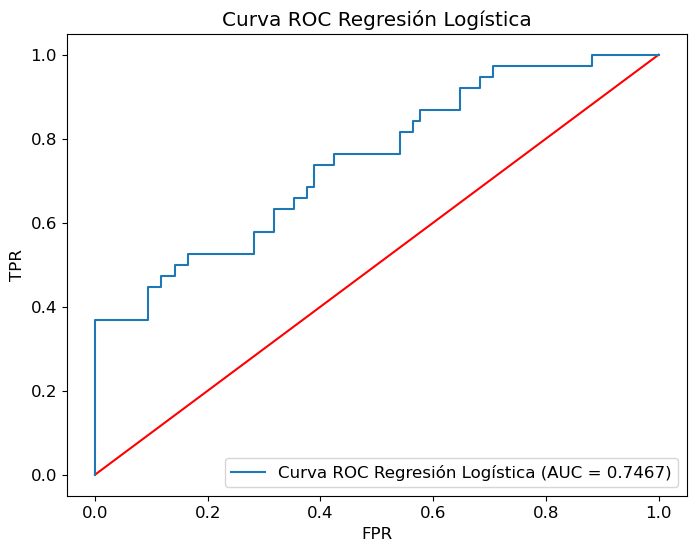

In [89]:
# Gráfica Curva ROC
plot_roc_curve(y_test, y_proba_test, 'Regresión Logística')

### Ejecutando con varios optimizadores y reguladores
Construiremos el modelo de Regresión logística nuevamente para el mismo conjunto de datos, pero esta vez, usa diferentes valores de <b>solver</b> y <b>regularization</b>. Con esto podemos hacer comparaciones de varios modelos hasta encontrar el más adecuado:

In [91]:
solvers=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
Cs=[0.01,0.02,0.05,0.1]

for s in solvers:
    for c in Cs:
        LR = LogisticRegression(C=c, solver=s).fit(X_train,y_train)
        yhat = LR.predict(X_test)
        yhat_prob = LR.predict_proba(X_test)[:,1]
        print("Solver="+s+", C="+str(c)+
              "->Accuracy: "+str(metrics.accuracy_score(y_test, yhat)) +
             "->AUC : "+str(roc_auc_score(y_test, yhat_prob)))

Solver=newton-cg, C=0.01->Accuracy: 0.6910569105691057->AUC : 0.7578947368421053
Solver=newton-cg, C=0.02->Accuracy: 0.6910569105691057->AUC : 0.7582043343653251
Solver=newton-cg, C=0.05->Accuracy: 0.7886178861788617->AUC : 0.7520123839009288
Solver=newton-cg, C=0.1->Accuracy: 0.8048780487804879->AUC : 0.7442724458204334
Solver=lbfgs, C=0.01->Accuracy: 0.6910569105691057->AUC : 0.7585139318885449
Solver=lbfgs, C=0.02->Accuracy: 0.6910569105691057->AUC : 0.7582043343653251
Solver=lbfgs, C=0.05->Accuracy: 0.7886178861788617->AUC : 0.7520123839009288
Solver=lbfgs, C=0.1->Accuracy: 0.8048780487804879->AUC : 0.7442724458204334
Solver=liblinear, C=0.01->Accuracy: 0.6910569105691057->AUC : 0.7436532507739939
Solver=liblinear, C=0.02->Accuracy: 0.7073170731707317->AUC : 0.7551083591331269
Solver=liblinear, C=0.05->Accuracy: 0.7804878048780488->AUC : 0.7591331269349845
Solver=liblinear, C=0.1->Accuracy: 0.7967479674796748->AUC : 0.7575851393188854
Solver=sag, C=0.01->Accuracy: 0.691056910569105

### Análisis Discriminante

In [93]:
# Análisis discriminante lineal y cuadrático
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA

lda = LDA()
model_lda = lda.fit(X_train, y_train)

qda = QDA()
model_qda = qda.fit(X_train, y_train)

In [94]:
# Predecimos! LDA
Y_pred_train = lda.predict(X_train) # realizando la predicción
Y_pred_test  = lda.predict(X_test) # realizando la predicción

Y_proba_test= lda.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

In [95]:
#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,Y_pred_train,y_test,Y_pred_test)

Matriz confusion: Train
[[327  10]
 [ 81  73]]
Matriz confusion: Test
[[64 21]
 [16 22]]
Accuracy: Train
0.814663951120163
Accuracy: Test
0.6991869918699187
Precision: Train
0.8795180722891566
Precision: Test
0.5116279069767442
Recall: Train
0.474025974025974
Recall: Test
0.5789473684210527


In [96]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.75      0.78        85
           1       0.51      0.58      0.54        38

    accuracy                           0.70       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.71      0.70      0.70       123



In [97]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test)

0.6904024767801858

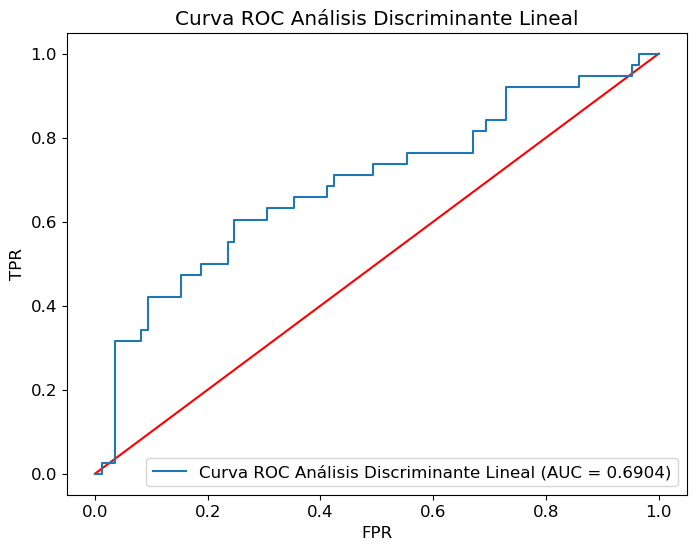

In [98]:
# Gráfica Curva ROC
plot_roc_curve(y_test, Y_proba_test, 'Análisis Discriminante Lineal')

In [99]:
# Predecimos! QDA
Y_pred_train = qda.predict(X_train) # realizando la predicción
Y_pred_test  = qda.predict(X_test) # realizando la predicción

Y_proba_test= qda.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

In [100]:
#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,Y_pred_train,y_test,Y_pred_test)

Matriz confusion: Train
[[251  86]
 [ 57  97]]
Matriz confusion: Test
[[ 0 85]
 [ 0 38]]
Accuracy: Train
0.7087576374745418
Accuracy: Test
0.3089430894308943
Precision: Train
0.5300546448087432
Precision: Test
0.3089430894308943
Recall: Train
0.6298701298701299
Recall: Test
1.0


In [101]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.31      1.00      0.47        38

    accuracy                           0.31       123
   macro avg       0.15      0.50      0.24       123
weighted avg       0.10      0.31      0.15       123



In [102]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test)

0.5

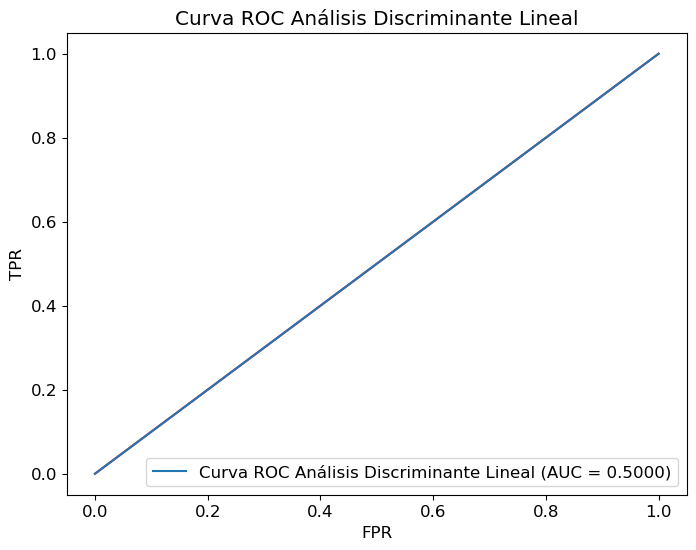

In [103]:
# Gráfica Curva ROC
plot_roc_curve(y_test, Y_proba_test, 'Análisis Discriminante Lineal')

### Árbol de Clasificación CART

In [105]:
# Arbol de Clasificacion CART
from sklearn.tree import DecisionTreeClassifier
tree_bonsai = DecisionTreeClassifier(
                       ccp_alpha=0.0, 
                       class_weight=None, 
                       criterion='gini',
                       max_depth=2,           # Profundidad del arbol
                       max_features=3,        # Numero maximo de variables
                       max_leaf_nodes=None,   # Numero de nodos
                       min_samples_leaf=100, 
                       min_samples_split=200,
                       min_weight_fraction_leaf=0.0, 
                       random_state=None, 
                       splitter='best')

In [106]:
# Arbol de Clasificacion CART
from sklearn.tree import DecisionTreeClassifier
tree_complete = DecisionTreeClassifier()

In [107]:
# Arbol de Clasificacion CART (Experto)
from sklearn.tree import DecisionTreeClassifier
tree_expert = DecisionTreeClassifier(
                       ccp_alpha=0.0, 
                       class_weight=None, 
                       criterion='gini',
                       max_depth=3,         # Profundidad del arbol (4)
                       max_features=6,     # Numero maximo de variables
                       max_leaf_nodes=None, # Numero de nodos
                       min_samples_leaf=20, 
                       min_samples_split=40,
                       min_weight_fraction_leaf=0.0, 
                       random_state=None, 
                       splitter='best')

In [108]:
# Entrenamos!
tree_bonsai = tree_bonsai.fit(X_train,y_train) # ajustando el modelo a mis datos
tree_complete = tree_complete.fit(X_train,y_train) # ajustando el modelo a mis datos
tree_expert = tree_expert.fit(X_train,y_train) # ajustando el modelo a mis datos

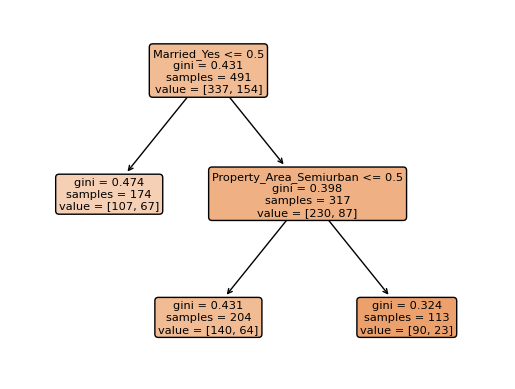

In [109]:
# Visualizando el arbol!
from sklearn.tree import plot_tree
_ = plot_tree(tree_bonsai, feature_names = X_train.columns, rounded = True, filled = True)

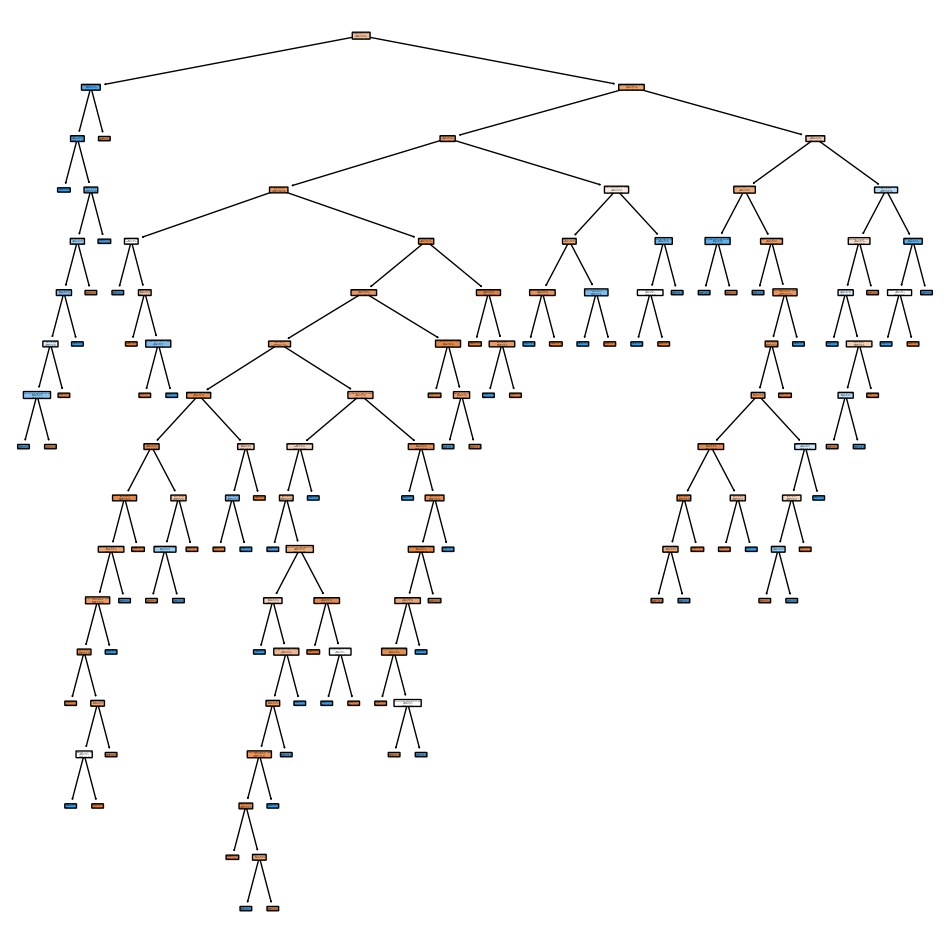

In [110]:
plt.figure(figsize=(12,12))
_ = plot_tree(tree_complete, feature_names = X_train.columns, rounded = True, filled = True)
plt.show()

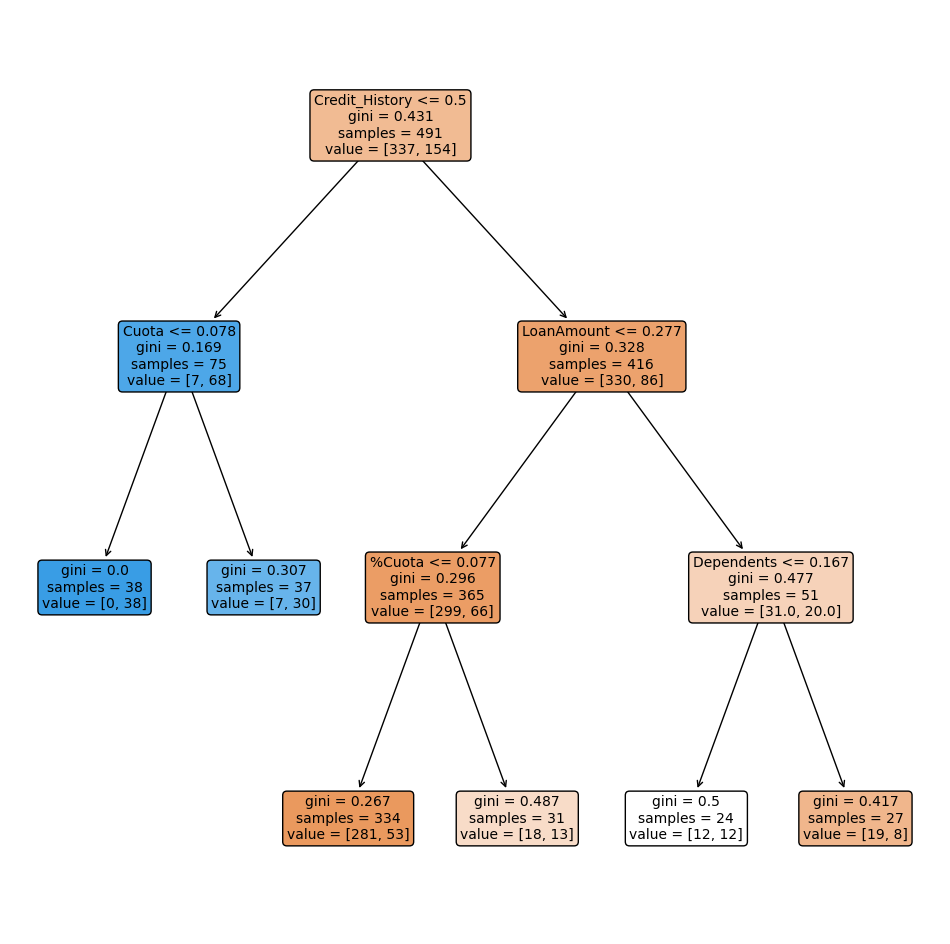

In [111]:
plt.figure(figsize=(12,12))
_ = plot_tree(tree_expert, fontsize= 10, feature_names = X_train.columns, rounded = True, filled = True)
plt.show()

In [112]:
# Predecimos!
Y_pred_train = tree_expert.predict(X_train) # realizando la predicción
Y_pred_test  = tree_expert.predict(X_test) # realizando la predicción

Y_proba_test= tree_expert.predict_proba(X_test)[:,1]   #Prediccion de probabilidades del target

In [113]:
#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,Y_pred_train,y_test,Y_pred_test)

Matriz confusion: Train
[[330   7]
 [ 86  68]]
Matriz confusion: Test
[[85  0]
 [24 14]]
Accuracy: Train
0.8105906313645621
Accuracy: Test
0.8048780487804879
Precision: Train
0.9066666666666666
Precision: Test
1.0
Recall: Train
0.44155844155844154
Recall: Test
0.3684210526315789


In [114]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        85
           1       1.00      0.37      0.54        38

    accuracy                           0.80       123
   macro avg       0.89      0.68      0.71       123
weighted avg       0.85      0.80      0.77       123



In [115]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test)

0.6845201238390093

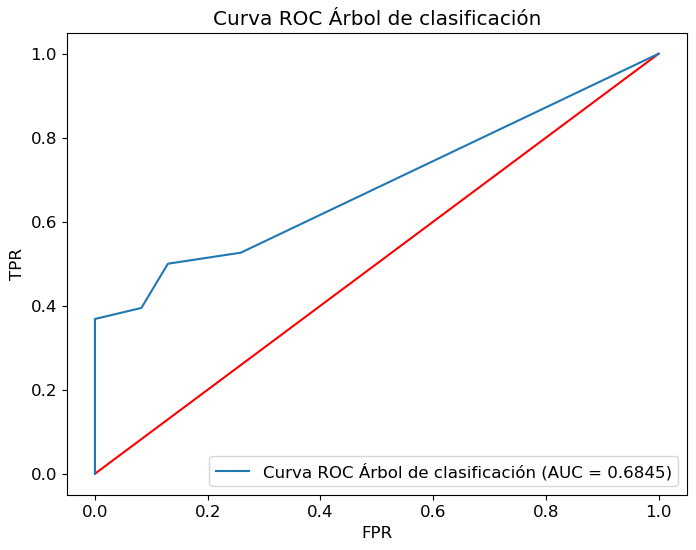

In [116]:
# Gráfica Curva ROC
plot_roc_curve(y_test, Y_proba_test, 'Árbol de clasificación')

### KNN

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   #se recomienda reescalar la base antes de usar esta técnica
scaler.fit(X_train)

X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_ss, y_train)

KNeighborsClassifier(n_neighbors=9)

In [120]:
# Predecimos!
Y_pred_train = knn.predict(X_train_ss) # realizando la predicción
Y_pred_test  = knn.predict(X_test_ss) # realizando la predicción

Y_proba_test= knn.predict_proba(X_test_ss)[:,1]   #Prediccion de probabilidades del target

In [121]:
#Cálculo de los indicadores mas relevantes!
metricas_confusion(y_train,Y_pred_train,y_test,Y_pred_test)

Matriz confusion: Train
[[328   9]
 [ 83  71]]
Matriz confusion: Test
[[82  3]
 [26 12]]
Accuracy: Train
0.8126272912423625
Accuracy: Test
0.7642276422764228
Precision: Train
0.8875
Precision: Test
0.8
Recall: Train
0.461038961038961
Recall: Test
0.3157894736842105


In [122]:
print(metrics.classification_report(y_test, Y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85        85
           1       0.80      0.32      0.45        38

    accuracy                           0.76       123
   macro avg       0.78      0.64      0.65       123
weighted avg       0.77      0.76      0.73       123



In [123]:
# ROC AUC
roc_auc_score(y_test, Y_proba_test)

0.6142414860681114

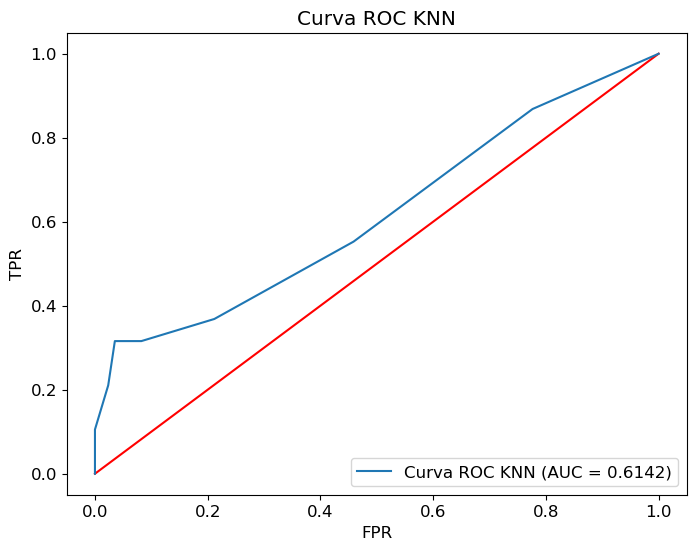

In [124]:
# Gráfica Curva ROC
plot_roc_curve(y_test, Y_proba_test, 'KNN')

### Búsqueda de hiperparpametros con GridSearch
Este procedimiento permite encontrar los mejores hiperparámetros de un modelo mediante una búsqueda exhaustiva.
Se entrega una lista de valores para distintos hiperparámetros del algoritmo.
Se evalúa el modelo para cada combinación de hiperparámetros y se selecciona la que obtenga mejores valores en la métrica de evaluación.

Construiremos el modelo SVM nuevamente para el mismo conjunto de datos, pero esta vez, con un algoritmo que busca los mejores hiperparámetros y utilizando Kernels Lineal y Radial.

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
import multiprocessing

Probemos esta búsqueda codiciosa con un árbol de decisión, haciendo búsquedas sobre varios parámetros importantes:

In [128]:
from sklearn.tree import DecisionTreeClassifier

In [129]:
# Grid de hiperparámetros evaluados - ARBOL CART
# ==============================================================================
param_grid = {'max_depth': [1,2,3,4,5,6,7,8,9,10],
              'max_features': [3,4,5,6,7,8,9],
              'min_samples_leaf': [20,50,100],
              'min_samples_split': [40,100,200]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = DecisionTreeClassifier(
                       ccp_alpha=0.0, 
                       class_weight=None, 
                       criterion='gini',
                       max_leaf_nodes=None,
                       min_weight_fraction_leaf=0.0, 
                       random_state=None, 
                       splitter='best'),
        param_grid = param_grid,
        scoring    = 'roc_auc',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,mean_test_score,std_test_score,mean_train_score,std_train_score
423,7,8,20,40,0.777468,0.041728,0.865847,0.017234
621,10,9,20,40,0.763633,0.049463,0.869437,0.016452
243,4,9,20,40,0.763489,0.036355,0.827686,0.018667
370,6,9,20,100,0.761518,0.038664,0.831724,0.018616
351,6,7,20,40,0.759438,0.026604,0.857355,0.015791
297,5,8,20,40,0.758274,0.057719,0.834868,0.035066
424,7,8,20,100,0.757511,0.050089,0.826586,0.020570
488,8,8,20,200,0.756259,0.044087,0.802000,0.015720
612,10,8,20,40,0.755851,0.043919,0.862872,0.015938
558,9,9,20,40,0.755551,0.048341,0.865497,0.015650


In [130]:
# Arbol de Clasificacion CART (mejores parámetros)
from sklearn.tree import DecisionTreeClassifier
tree_final = DecisionTreeClassifier(
                       ccp_alpha=0.0, 
                       class_weight=None, 
                       criterion='gini',
                       max_depth=10,         # Profundidad del arbol (4)
                       max_features=8,     # Numero maximo de variables
                       max_leaf_nodes=None, # Numero de nodos
                       min_samples_leaf=20, 
                       min_samples_split=100,
                       min_weight_fraction_leaf=0.0, 
                       random_state=None, 
                       splitter='best')

tree_final = tree_final.fit(X_train,y_train) # ajustando el modelo a mis datos

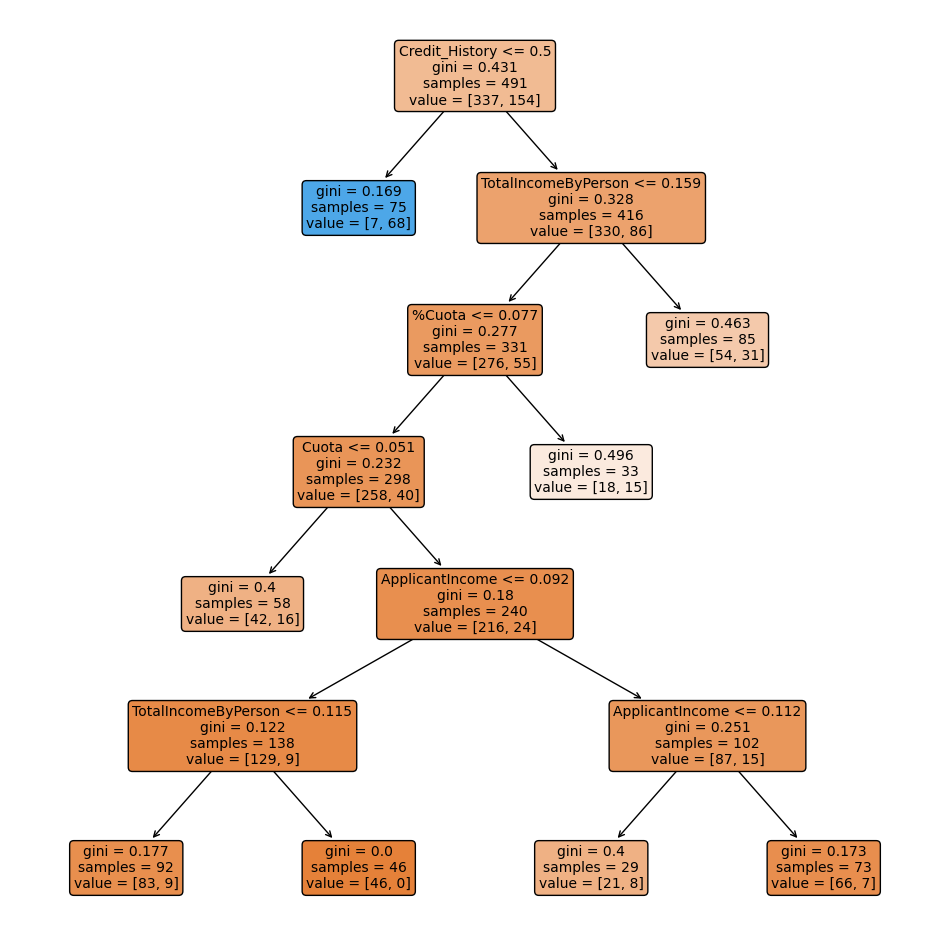

In [131]:
plt.figure(figsize=(12,12))
_ = plot_tree(tree_final, fontsize= 10, feature_names = X_train.columns, rounded = True, filled = True)
plt.show()